<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

<ipython-input-1-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [68]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [19]:
#Columns' names
df.columns.values

array(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode',
       'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot',
       'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt',
       'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp',
       'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote',
       'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'Bett

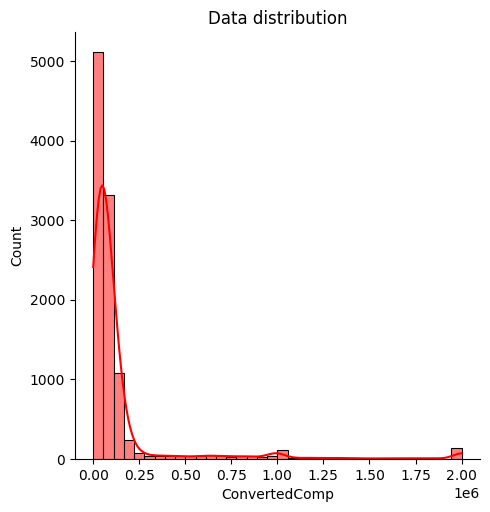

In [65]:
# your code goes here
#import libraries
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%pip install seaborn
import seaborn as sns

sns.displot(df['ConvertedComp'], kde=True, bins=int(180/5), color= 'red')
plt.title('Data distribution')
plt.show()

Plot the histogram for the column `ConvertedComp`.


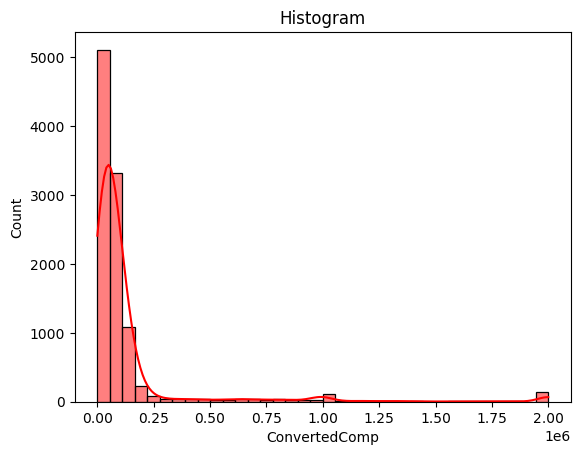

In [99]:
# your code goes here
#Histogram for ConvertedComp
sns.histplot(df['ConvertedComp'], kde=True, bins=int(180/5), color= 'red')
plt.title('Histogram')
plt.show()

What is the median of the column `ConvertedComp`?


In [67]:
# your code goes here
#Median of column ConvertedComp
me_CC = df['ConvertedComp'].median()
print('The median of the column Convertedcomp is: ', me_CC)

The median of the column Convertedcomp is:  57745.0


How many responders identified themselves only as a **Man**?


In [78]:
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

In [79]:
# your code goes here
man_q = 0
for i in range(0, len(df['Gender'])):
    if df['Gender'][i] == 'Man':
        man_q += 1
print(man_q, 'responders identifies themselves as Man')

10480 responders identifies themselves as Man


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [87]:
# your code goes here

wom_q = 0
wom_CC =[]
for i in range(0, len(df['Gender'])):
    if df['Gender'][i] == 'Woman':
        wom_q += 1
        wom_CC.append(df['ConvertedComp'][i])

df_wom = pd.DataFrame(wom_CC)
df_wom_median = df_wom.median()
print('The median ConvertedComp for women is: ', df_wom_median)

The median ConvertedComp for women is:  0    57708.0
dtype: float64


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [98]:
# your code goes here
print('Five number summary for column Age \n')
#min
age_min = df['Age'].min()
print('The minimum age is: ', age_min)
#max
age_max = df['Age'].max()
print('The maximum age is: ', age_max)
#median age
age_median = df['Age'].median()
print('The median age is: ', age_median)
#q1 age
age_q1 = df['Age'].quantile(0.25)
print('The q1 age is: ', age_q1)
#q3 age
age_q3 = df['Age'].quantile(0.75)
print('The q3 age is: ', age_q3)

Five number summary for column Age 

The minimum age is:  16.0
The maximum age is:  99.0
The median age is:  29.0
The q1 age is:  25.0
The q3 age is:  35.0


In [91]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


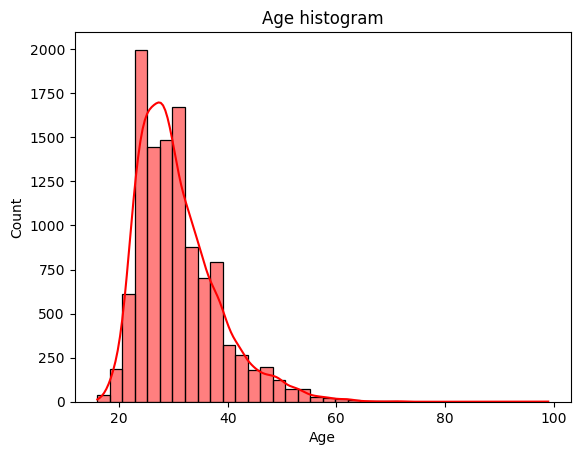

In [100]:
# your code goes here
#Histogram for age
sns.histplot(df['Age'], kde=True, bins=int(180/5), color= 'red')
plt.title('Age histogram')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:ylabel='ConvertedComp'>

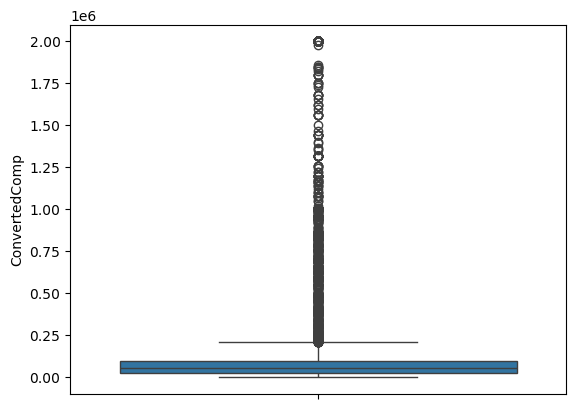

In [107]:
# your code goes here
sns.boxplot(y=df['ConvertedComp'], data=df)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [109]:
# your code goes here
#q1 ConvertedComp
CC_q1 = df['ConvertedComp'].quantile(0.25)
print('ConvertedComp q1 is: ', CC_q1)
#q3 ConvertedComp
CC_q3 = df['ConvertedComp'].quantile(0.75)
print('ConvertedComp q1 is: ', CC_q3)
CC_intq = CC_q3 - CC_q1
print('ConvertedComp inter quartile is: ', CC_intq)

ConvertedComp q1 is:  26868.0
ConvertedComp q1 is:  100000.0
ConvertedComp inter quartile is:  73132.0


Find out the upper and lower bounds.


In [116]:
# your code goes here
#lower bound
CC_low = CC_q1 - 1.5 * CC_intq
print('The lower bound for ConvertedComp is: ', CC_low)
#Upper bound
CC_upp = CC_q3 + 1.5 * CC_intq
print('The upper bound for ConvertedComp is: ', CC_upp)


The lower bound for ConvertedComp is:  -82830.0
The upper bound for ConvertedComp is:  209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [120]:
# your code goes here

#Outliers
outliers = (df['ConvertedComp'] < CC_low) | (df['ConvertedComp'] > CC_upp)

#Number of outliers
n_outliers = outliers.sum()

print('The number of outliers is: ', n_outliers)

The number of outliers is:  879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [132]:
# your code goes here
#New dataframe after the outliers in ConvertedComp had been dropped
df1 = df.drop(df[df['ConvertedComp'] == outliers].index)
df2 = pd.DataFrame(df1)
df2_CC = df2['ConvertedComp']
df2_CC

0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 11372, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [160]:
# your code goes here

#This comes from the answer given by Niveditha to Kelly Ondek: "Error with Correlation"
#By using df.select_dtypes(include=['int64', 'float64']),
#you are selecting only the columns with numeric data types (integers and floats).
#This ensures that corr() only operates on numeric data, avoiding the issue with non-numeric data  

df1_num = df1.select_dtypes(include=['int64', 'float64'])
df1_num.corr()['Age']

Respondent       0.004311
CompTotal        0.006965
ConvertedComp    0.105483
WorkWeekHrs      0.036480
CodeRevHrs      -0.020118
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
